# Exploratory Data Analysis [ EDA ] - Titanic Dataset

In [316]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
font1 = {'family':'serif','color':'darkred','size':18}
font2 = {'family':'serif','color':'darkred','size':15}

### Loadi the Titanic dataset

In [318]:
data =pd.read_csv("Titanic-Dataset.csv")

### Look at the dataset first 

In [320]:
data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q


- What the dataset contains :: 
  - Passenger information (age, gender, family relations)
  - Socio-economic details (ticket class, fare, cabin)
  - Travel details (embarkation port)
  - Survival outcome (whether a passenger survived or not)

### Find shape of Dataset [ Number of Rows & Number of Columns ]

In [323]:
print('shape of the dataset ::',data.shape)
print('Number of total Rows ::',data.shape[0])
print('Number of total Columns ::',data.shape[1])

shape of the dataset :: (891, 12)
Number of total Rows :: 891
Number of total Columns :: 12


- Each row represent one individual passenger who was aboard the Titanic.
- The column represent personal details, ticket info, travel class, and survival outcome for that passenger.

### Get Information about Dataset

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The Titanic dataset consists of 891 passenger records with a binary survival outcome.
- Some immediate missing value issue observed
- It contains a mix of numerical and categorical features, notable missing values in Age and Cabin, and strong socio-demographic patterns that significantly influence survival.

### Get overall statistics about the Dataset

In [329]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- The summary covers only numerical columns
- Shows count, mean, std, min, 25%, 50% (median), 75%, max
- Helps detect missing values, skewness, outliers, and scale differences

###  By using filtering, get the records of male passengers

In [332]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [333]:
data[data['Sex']=='male'].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [334]:
data[data['Sex']=='male'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


- There is 577 record of Male in the dataset
- Male survival rate is much lower than dataset average (~38%)
- Men were more concentrated in lower classes
- Paid lower fares on average
- Male passengers had a significantly lower survival rate compared to the overall population. Most male passengers belonged to lower socio-economic classes, traveled alone, and paid lower fares, which collectively reduced their chances of survival.

### Check Null values in the Dataset

In [337]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Null Values
  - Age Column :: 177 -  [ handle through mean() - missing value imputation ]
  - Cabin Column :: 687 - [ significantly high number - drop Cabin column ]
  - Embarked Column :: 2 - [ handle through mode() - missing value imputation]

###  Drop the “Cabin” column
       Out of 890 records the Cabin column has 687 Null values that's why dropping Cabin column

In [340]:
data.drop(['Cabin'],axis = 1,inplace = True)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Handle missing values
      - Age Column :: 177 -  [ handle through mean() - missing value imputation ]
      - Embarked Column :: 2 - [ handle through mode() - missing value imputation]

In [342]:
# The missing values are now in Age and Embarked Column
if "Age" in data.columns:
    data["Age"].fillna(data["Age"].mean(), inplace=True)
if "Embarked" in data.columns:
    data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
# mode() gives you the most frequent value(s) in a column.
# It returns a Series, not a single value.    

In [343]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### What are the unique values of “ Embarked ” column?

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


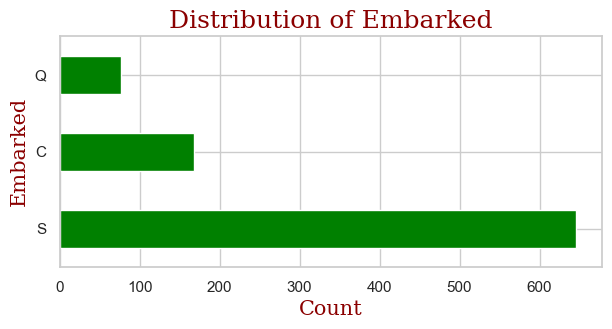

In [345]:
print(data['Embarked'].value_counts())
plt.figure(figsize=(7,3))
data['Embarked'].value_counts().plot(kind='barh', color='green')
plt.title("Distribution of Embarked",fontdict=font1)
plt.xlabel("Count",fontdict=font2)
plt.ylabel("Embarked",fontdict=font2)
plt.show()

- S - Southampton , Q - Queenstown , C - Cherbourg
- Most passengers embarked from Southampton, while Cherbourg despite fewer passengers shows better survival outcomes due to higher socio-economic representation, making embarkation port an indirect but informative feature.

### How many people survived and how many died?

In [348]:
data['Survived'].unique()  
# 0 = Dead
# 1 = Alive

array([0, 1], dtype=int64)

Survived
0    549
1    342
Name: count, dtype: int64


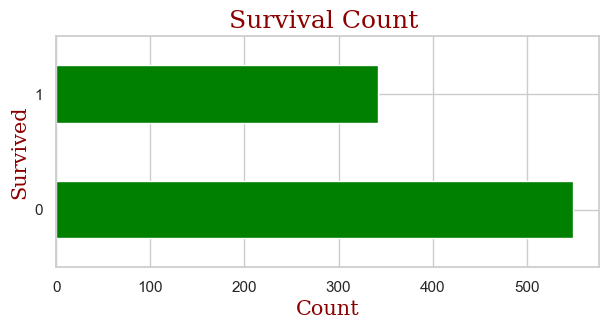

In [349]:
print(data['Survived'].value_counts())
plt.figure(figsize=(7,3))
data['Survived'].value_counts().plot(kind='barh', color='green')
plt.title("Survival Count ",fontdict=font1)
plt.xlabel("Count",fontdict=font2)
plt.ylabel("Survived",fontdict=font2)
plt.show()

- The survival outcome is imbalanced, with a significantly higher number of passengers not surviving
- The dataset contains more non-survivors than survivors
- Class distribution:
  - 0 (Did not survive) → majority
  - 1 (Survived) → minority

### Bivariate Analysis
     (a) Who had better chance of survival – Male or Female?
     (b) Which Passenger class has better chance of survival?

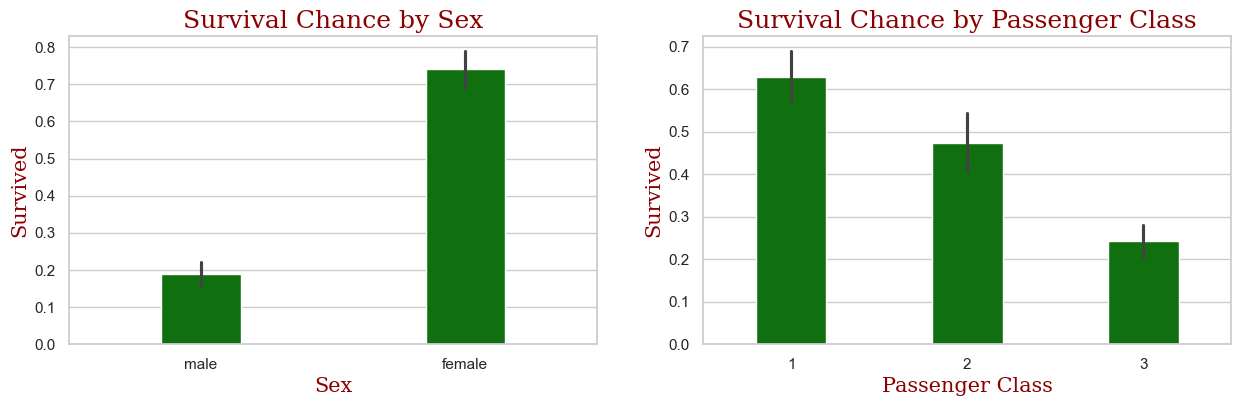

In [352]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Sex',y = "Survived",data = data,width = 0.3,color='green')
plt.title("Survival Chance by Sex",fontdict = font1)
plt.xlabel("Sex",fontdict= font2)
plt.ylabel("Survived",fontdict = font2)


plt.subplot(1,2,2)
sns.barplot(x='Pclass',y = "Survived",data = data,width = 0.4,color='green')
plt.title("Survival Chance by Passenger Class",fontdict = font1)
plt.xlabel("Passenger Class",fontdict= font2)
plt.ylabel("Survived",fontdict = font2)
plt.show()       

-  According to the passenger class 
   - Class - 1 has better chances of sruvive
   - Class - 3 has lowest chance of survive
- According to sex
  - female has better chances of sruvive compared to male

### Feature Engineering
    (a) Calculate total number of passengers (Parents + Children)
    (b) Calculate fare per person

In [355]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [356]:
print(data['SibSp'].unique())
print(data['Parch'].unique())

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


- SibSp [ Siblings/Spouses aboard ]
 - It tells how many brothers, sisters, or spouses each passenger had on the Titanic.
 - Example:
   - 0 → passenger traveled alone (no sibling or spouse).
   - 1 → passenger had either 1 sibling or spouse.
   - 3 → passenger had 3 siblings/spouses on board.
-  Parch [ Parents/Children aboard ]
  - It tells how many parents or children each passenger had on the Titanic.
  - Example:
    - 0 → no parent or child with them.
    - 1 → passenger had either 1 parent or child.
    - 2 → passenger had 2 parents/children with them.

In [358]:
data["Family-Size"] = data["SibSp"] + data["Parch"]
data['Family-Size'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [359]:
print("The total number of passenger ::",data['Family-Size'].value_counts().sum())

The total number of passenger :: 891


- The engineered Family-Size feature captures whether a passenger traveled alone or with family, revealing that small family groups had higher survival chances compared to solo travelers or large families
- Family-Size represents the number of family members traveling with a passenger
(siblings/spouses + parents/children).
- A value of:
  - 0 → Passenger traveled alone
  - 2,3,4,etc → Passenger traveled with family

#### For the fare per person
    Fare = It represents the ticket price that each passenger paid to board the Titanic.
    Fare-per-person represents the estimated ticket cost paid per individual passenger. Since ticket fares were often shared among family member traveling together, the total fare is divided by the total number of people in the booking group (Family-Size + 1).

In [362]:
data["Fare-per-person"] = data["Fare"] / (data["Family-Size"] + 1)

Fare-per-person
13.0000    59
8.0500     50
7.7500     39
7.8958     38
10.5000    28
Name: count, dtype: int64


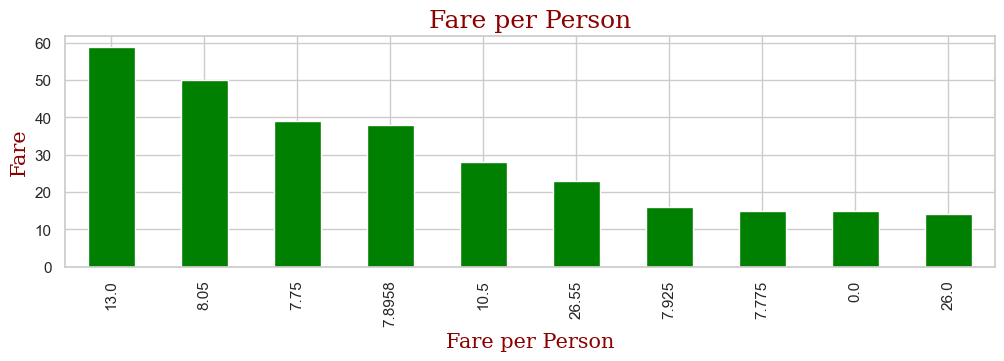

In [363]:
print(data['Fare-per-person'].value_counts().head())
plt.figure(figsize=(12,3))
data['Fare-per-person'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Fare per Person",fontdict=font1)
plt.xlabel("Fare per Person",fontdict=font2)
plt.ylabel("Fare",fontdict=font2)
plt.show()

- The most common fare-per-person values fall within a low price range, indicating that the majority of passengers traveled in lower classes, reinforcing the strong link between individual economic status and survival.

### How many passengers were in First, Second, Third Class ?

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


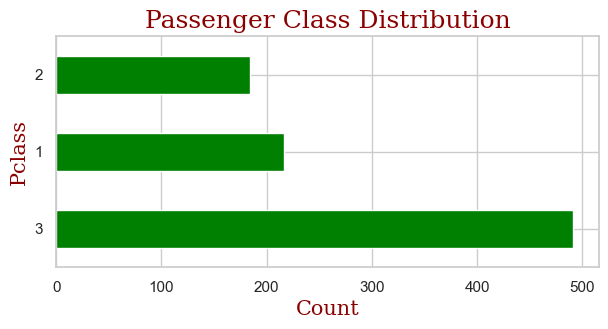

In [366]:
print(data['Pclass'].value_counts())
plt.figure(figsize=(7,3))
data['Pclass'].value_counts().plot(kind='barh', color='green')
plt.title("Passenger Class Distribution",fontdict=font1)
plt.xlabel("Count",fontdict=font2)
plt.ylabel("Pclass",fontdict=font2)
plt.show()

- 3rd class passengers form the majority of the dataset (491 passengers, ~55%).
- 1st class has 216 passengers (~ 24%), while 2nd class has 184 passengers (~ 21%).
- This shows a strong class imbalance, with over half of the passengers traveling in the lowest socio-economic class.

### Number of Male and Female passengers?

Sex
male      577
female    314
Name: count, dtype: int64


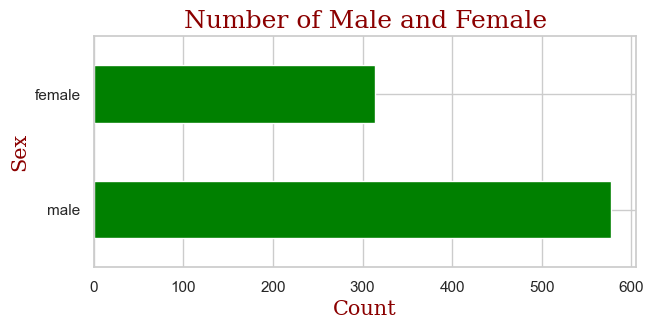

In [369]:
print(data['Sex'].value_counts())
plt.figure(figsize=(7,3))
data['Sex'].value_counts().plot(kind='barh', color='green')
plt.title("Number of Male and Female",fontdict=font1)
plt.xlabel("Count",fontdict=font2)
plt.ylabel("Sex",fontdict=font2)
plt.show()

### Bivariate Analysis
     (a) Who had better chance of survival – Alone or with family
     (b) Does age influence survival probability?

In [ ]:
plt.figure(figsize=(15,4))
data['Age-Group'] = pd.cut(data['Age'],bins=[0, 12, 20, 40, 60, 80],labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
plt.subplot(1,2,1)
sns.barplot( x='Age-Group', y='Survived', data=data, width=0.5, color='green')
plt.title("Survival Chance by Age Group", fontdict=font1)
plt.xlabel("Age Group", fontdict=font2)
plt.ylabel("Survived", fontdict=font2)

# ─────────────────────────────────────────────
data['IsAlone'] = data['Family-Size'].apply(lambda x: 'Alone' if x == 0 else 'With Family')
plt.subplot(1,2,2)
sns.barplot( x ='IsAlone', y='Survived', data=data, width=0.3, color='green')
plt.title("Survival Chance: Alone vs With Family", fontdict=font1)
plt.xlabel("Travel Type", fontdict=font2)
plt.ylabel("Survived", fontdict=font2)
plt.show()

- Age has a strong influence on survival probability:
  - Children show the highest survival rate, reflecting evacuation priority.
Teen, adult, and middle-aged passengers have moderate and similar survival chances.
Senior passengers have the lowest survival rate, indicating vulnerability during evacuation.
- Family context significantly impacts survival:
  - Passengers traveling with family had a much higher survival probability than those traveling alone.
Solo travelers were at a disadvantage, likely due to lack of assistance and support during emergencies.